# Predicting Strokes

In [1]:
import pandas as pd
# Retrtrive data
data = pd.read_csv('stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Serious Questions: 
### 1. Is there a significant correlation between the predictors?
### 2. What is the difference in means of bmi, glucose levels and age for people who has had a stroke and those who hasn't?
### 3. What proportions of those who have had a heart attack have also had a stroke?

<function matplotlib.pyplot.show(close=None, block=None)>

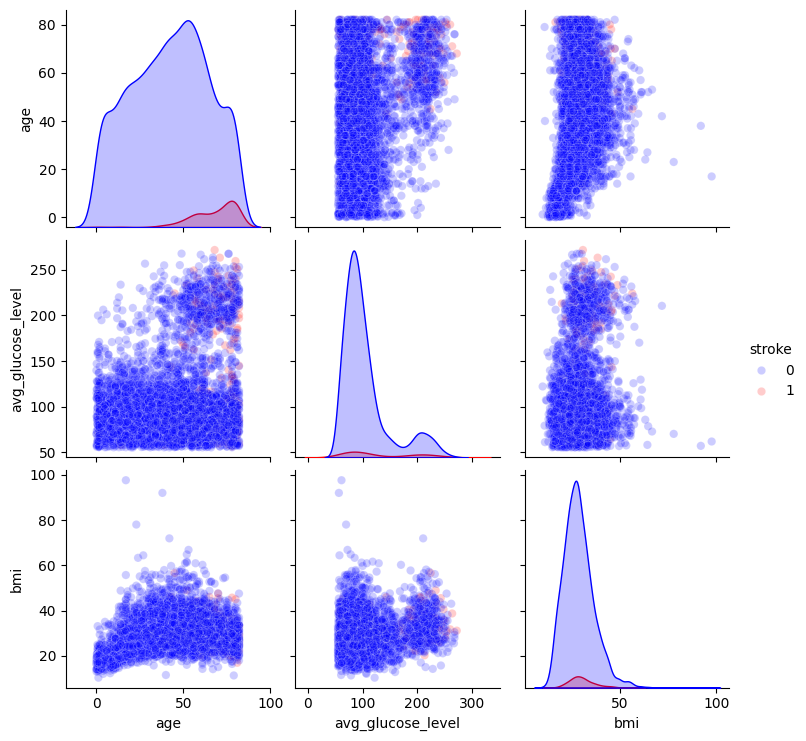

In [4]:
# 1. Plot pairs plot for predictors
import matplotlib.pyplot as plt
import seaborn as sns
# specify features and plot a pairsplot using seaborn
features = ['age', 'avg_glucose_level', 'bmi', 'stroke']

sns.pairplot(data[features], diag_kind="kde",hue="stroke", palette=["blue", "red"], 
             plot_kws={"alpha": 0.2}     
)
plt.show

### There is not a clear correlation between the predictors which is good for models where one might want to test their interaction effect on some response variable like stroke.

In [9]:
# 2. Compare means of features for people with strokes and those without
stroke_data = data[data['stroke']==1]
stroke_data2 = data[data['stroke']==0]
print(stroke_data[features].mean())
print(stroke_data2[features].mean())

age                   67.728193
avg_glucose_level    132.544739
bmi                   30.471292
stroke                 1.000000
dtype: float64
age                   41.971545
avg_glucose_level    104.795513
bmi                   28.823064
stroke                 0.000000
dtype: float64


### Here we can note that there is a difference in means which means people who are older, have a higher average glucose levels and bmi in this study tends to have strokes at a higher rate. Further analysis should be made to explore this link. 

In [21]:
# 3. Proportions of those who have had a heart attack and a stroke

joint_freq = data.groupby(['stroke', 'heart_disease']).size().reset_index(name='Count')
heart_freq = data['heart_disease'].value_counts().reset_index()
heart_freq.columns = ['heart_disease', 'Total']

merged = pd.merge(joint_freq, heart_freq, on='heart_disease')
merged['proportion'] = merged['Count'] / merged['Total']

print(merged[['stroke', 'heart_disease', 'proportion']])
 

   stroke  heart_disease  proportion
0       0              0    0.958213
1       1              0    0.041787
2       0              1    0.829710
3       1              1    0.170290


## The prevalence of heart disease is higher among people who has had a stroke.

# Data Preperation

## Cleaning Data

In [73]:
import pandas as pd
# Retrtrive data
data = pd.read_csv('cell_phones_total.csv')

# replace Nan values with 0
data_rep= data.fillna(0) 

# temporarily remove first column 
f=data_rep.iloc[:, 0] 
data2 = data_rep.iloc[:, 1:]

# function that removes last symbol and changes value to the right value
def convert(value):
    if isinstance(value, str):
        value = value.lower().strip()
        if value.endswith('k'):
            return float(value[:-1]) * 1e3 # change to float and multiply with the right amount
        elif value.endswith('m'):
            return float(value[:-1]) * 1e6
        elif value.endswith('b'):
            return float(value[:-1]) * 1e9       
        return None  
    return value  

data_final=data2.applymap(convert) # call function with all values (applymap)

data_final = pd.concat([f, data_final], axis=1) # merge other strings again as the first column

data_final.head()

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,0.0,135000.0,139000.0,140000.0,141000.0,0.0,0.0,0.0,0.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0
